In [132]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [133]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [140]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [141]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [142]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [143]:
# View all of the classes that automap found
#Base.classes.keys()
inspector = inspect(engine)

inspector.get_table_names()

['measurement', 'station']

In [144]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

inspector.get_columns('measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [145]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [146]:
# Find the most recent date in the data set.
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()

print('Most Recent Date: ' + last_date[0])

Most Recent Date: 2017-08-23


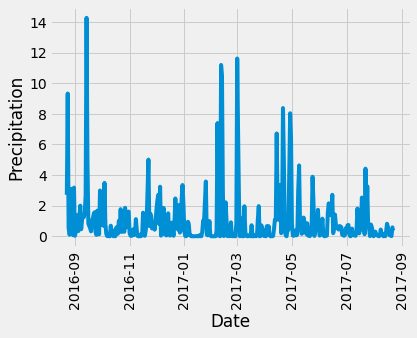

In [147]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.

year_earlier_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

year_earlier_date

# Perform a query to retrieve the data and precipitation scores

session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= year_earlier_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
weather = pd.DataFrame(session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= year_earlier_date).all())

weather = weather.dropna(how='any')

weather = weather.sort_values(by='date')


# Sort the dataframe by date

weather = weather.groupby(['date']).sum()

weather = weather.reset_index()

weather['date'] = pd.to_datetime(weather['date'])

weather.head()
# Use Pandas Plotting with Matplotlib to plot the data


plt.plot(weather['date'], weather['prcp'])

plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.xticks(rotation=90)

plt.show()

In [148]:
# Use Pandas to calcualte the summary statistics for the precipitation data
weather.describe()

,prcp
count,366.000000
mean,0.978907
std,1.776349
min,0.000000
25%,0.052500
50%,0.405000
75%,1.087500
max,14.280000


# Exploratory Station Analysis

In [149]:
# Design a query to calculate the total number stations in the dataset
inspector.get_columns('station')


[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [151]:
total_stations = session.query(measurement).group_by(measurement.station).count()
print('Total Stations: '+ str(total_stations))

Total Stations: 9


In [131]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

#session.query(station.station, station.elevation).group_by(station.station).all()
#session.query( measurement.station, measurement.prcp).group_by(measurement.station).count_distinct()

session.query(measurement).group_by(measurement.station).count()

9

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.



In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()